In [1]:
import sys
import pandas as pd
import numpy as np
import sqlite3 as db
import time
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import csv
from IPython.display import display
import seaborn as sns
print("Python version: {}".format(sys.version))
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("sqlite3 version: {}".format(db.version))
import matplotlib
print(matplotlib.__version__)

Python version: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
pandas version: 0.25.1
numpy version: 1.16.5
sqlite3 version: 2.6.0
3.2.0


In [2]:
start = time.time()
df=pd.read_csv('Crime_Responses.csv')
print ("\nFive random records from the `df` table:")
display(df.iloc[np.random.choice (len (df), 5)])


Five random records from the `df` table:


,ID,Incident Type,Report Date,Offense Date,Report Hour of Day,Report Day of Week,Offense Hour of Day,Offense Day of Week,City,State,...,Longitude,Zip Code Boundaries,Location,2010 Census Tracts,Commission Districts,Gainesville Police Districts,Florida Census Zip Codes,Gainesville Enterprise Zone Boundaries,GPD Zones,Gainesville Fire Response Districts
133870,219001957,Battery (simple),02/03/2019 05:33:00 PM,02/03/2019 04:00:00 PM,17,Sunday,16,Sunday,GAINESVILLE,FL,...,-82.280634,4.0,POINT (-82.280634 29.680642),10.0,1.0,2.0,766.0,NaN,11.0,2.0
60991,213008731,Battery (aggravated),05/02/2013 11:17:00 AM,05/02/2013 11:15:00 AM,11,Thursday,11,Thursday,GAINESVILLE,FL,...,-82.301699,9.0,POINT (-82.301699 29.647646),5.0,1.0,2.0,1082.0,2.0,18.0,2.0
80508,214018254,Criminal Mischief (felony),09/14/2014 08:34:10 PM,09/13/2014 05:30:09 PM,20,Sunday,17,Saturday,GAINESVILLE,FL,...,-82.351518,3.0,POINT (-82.351518 29.654445),16.0,4.0,6.0,771.0,NaN,5.0,6.0
85345,215007513,Drug Violation,04/18/2015 05:14:45 PM,04/17/2015 08:00:00 PM,17,Saturday,20,Friday,GAINESVILLE,FL,...,-82.316884,1.0,POINT (-82.316884 29.635615),5.0,1.0,1.0,772.0,NaN,17.0,1.0
70175,214012676,Theft Petit - Other,07/01/2014 03:32:37 PM,07/01/2014 12:30:00 PM,15,Tuesday,12,Tuesday,GAINESVILLE,FL,...,-82.341888,4.0,POINT (-82.341888 29.701624),9.0,2.0,4.0,766.0,NaN,2.0,4.0


In [47]:
df.describe()

,ID,Report Hour of Day,Offense Hour of Day,Latitude,Longitude,Zip Code Boundaries,2010 Census Tracts,Commission Districts,Gainesville Police Districts,Florida Census Zip Codes,Gainesville Enterprise Zone Boundaries,GPD Zones,Gainesville Fire Response Districts
count,1.566190e+05,156619.000000,156619.000000,156619.000000,156619.000000,155506.000000,155512.000000,153257.000000,155476.000000,156039.000000,57048.000000,152206.000000,155476.000000
mean,2.392902e+08,12.399262,12.155588,29.654074,-82.341070,4.245077,16.159345,2.288515,4.099147,824.266754,2.163722,9.565287,4.099147
std,9.514101e+07,6.773426,7.222084,0.137342,0.135855,2.962734,11.444562,1.188326,3.511646,119.020887,0.615402,5.002588,3.511646
min,1.187000e+03,0.000000,0.000000,25.455473,-115.172957,1.000000,1.000000,1.000000,1.000000,763.000000,1.000000,1.000000,1.000000
25%,2.130045e+08,8.000000,7.000000,29.638711,-82.371144,2.000000,7.000000,1.000000,1.000000,767.000000,2.000000,5.000000,1.000000
50%,2.150142e+08,13.000000,13.000000,29.653792,-82.337605,4.000000,13.000000,2.000000,3.000000,770.000000,2.000000,10.000000,3.000000
75%,2.180018e+08,18.000000,18.000000,29.670726,-82.319362,7.000000,24.000000,3.000000,6.000000,772.000000,2.000000,14.000000,6.000000
max,9.214003e+09,23.000000,23.000000,44.243549,-71.013748,11.000000,45.000000,4.000000,12.000000,1085.000000,5.000000,18.000000,12.000000


In [42]:
df.columns

Index(['ID', 'Incident Type', 'Report Date', 'Offense Date',
       'Report Hour of Day', 'Report Day of Week', 'Offense Hour of Day',
       'Offense Day of Week', 'City', 'State', 'Address', 'Latitude',
       'Longitude', 'Zip Code Boundaries', 'Location', '2010 Census Tracts',
       'Commission Districts', 'Gainesville Police Districts',
       'Florida Census Zip Codes', 'Gainesville Enterprise Zone Boundaries',
       'GPD Zones', 'Gainesville Fire Response Districts'],
      dtype='object')

In [14]:
df.duplicated().sum()

0

In [43]:
df.loc[df['City'].str.contains('gai',na=False, case=False), 'City'] = 'GAINESVILLE'
df.loc[df['City'].str.contains('GANI',na=False, case=False), 'City'] = 'GAINESVILLE'
df.loc[df['City'].str.contains('GVIL',na=False, case=False), 'City'] = 'GAINESVILLE'
df.loc[df['City'].str.contains('UNIV',na=False, case=False), 'City'] = 'GAINESVILLE'


In [45]:
df['Address']=df['Address'].replace({'BLK':''}, regex=True)
df.loc[df['City'].str.contains('UNIC',na=False, case=False), 'City'] = 'UNICORERATED'
df.loc[df['City'].str.contains('UNIN',na=False, case=False), 'City'] = 'UNICORERATED'
df.loc[df['City'].str.contains('ALACH',na=False, case=False), 'City'] = 'ALACHUA'
df.loc[df['City'].str.contains('COU',na=False, case=False), 'City'] = 'COUTNY'
df.loc[df['City'].str.contains('HAW',na=False, case=False), 'City'] = 'HAWTHORN'
df.loc[df['City'].str.contains('HIGH',na=False, case=False), 'City'] = 'HIGHSPRINGS'
df.loc[df['City'].str.contains('NEW',na=False, case=False), 'City'] = 'NEWBERRY'

In [5]:
len(set(df['City']))

97

GAINESVILLE       155428
COUNTY               187
ALACHUA              177
UNINCORPERATED       162
NEWBERRY             113
HIGH SPRINGS          83
HAWTHORNE             79
UNINCORPORATED        60
MICANOPY              55
ARCHER                55
WALDO                 28
DAYTONA BEACH         14
COUN                  13
UNICORPERATED          7
ST AUGUSTINE           7
ALACHUA COUNTY         7
MELROSE                7
ORANGE PARK            6
OCALA                  6
PANAMA CITY            5
Name: City, dtype: int64

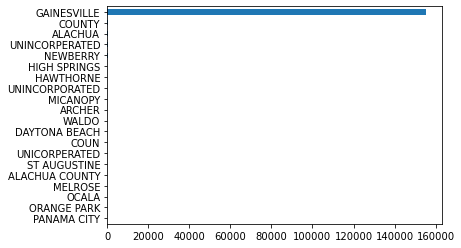

In [6]:
df.City.value_counts().iloc[:20].sort_values().plot(kind= 'barh')

df.City.value_counts().iloc[:20]

In [7]:
df.isnull().sum()

ID                                            0
Incident Type                                 0
Report Date                                   0
Offense Date                                  0
Report Hour of Day                            0
Report Day of Week                            0
Offense Hour of Day                           0
Offense Day of Week                           0
City                                         12
State                                         0
Address                                       0
Latitude                                      0
Longitude                                     0
Zip Code Boundaries                        1113
Location                                    580
2010 Census Tracts                         1107
Commission Districts                       3362
Gainesville Police Districts               1143
Florida Census Zip Codes                    580
Gainesville Enterprise Zone Boundaries    99571
GPD Zones                               

In [8]:
df['OffenseDate']=pd.to_datetime(df['Offense Date'])
df['ReportDate']=pd.to_datetime(df['Report Date'])


In [9]:
df['ODate']=df['OffenseDate'].dt.date
df['DOhour']=df['OffenseDate'].dt.strftime("%Y-%b-%d %H")
df['DOmonth']=df['OffenseDate'].dt.strftime("%Y-%b")
df['RDate']=df['ReportDate'].dt.date
df['DRhour']=df['ReportDate'].dt.strftime("%Y-%b-%d %H")
df['DRmonth']=df['ReportDate'].dt.strftime("%Y-%b")


#convert time variables

df['Oyear']=df['OffenseDate'].dt.strftime("%Y")
df['Omonth']=df['OffenseDate'].dt.strftime("%m")
df['Oday']=df['OffenseDate'].dt.strftime("%d")

df['Ryear']=df['ReportDate'].dt.strftime("%Y")
df['Rmonth']=df['ReportDate'].dt.strftime("%m")
df['Rday']=df['ReportDate'].dt.strftime("%d")

In [10]:
df['Oyear']=df['OffenseDate'].dt.strftime("%Y").astype(int)
df['Omonth']=df['OffenseDate'].dt.strftime("%m").astype(int)
df['Oday']=df['OffenseDate'].dt.strftime("%d").astype(int)

df['Ryear']=df['ReportDate'].dt.strftime("%Y").astype(int)
df['Rmonth']=df['ReportDate'].dt.strftime("%m").astype(int)
df['Rday']=df['ReportDate'].dt.strftime("%d").astype(int)

df['delayyear']=df['Ryear']-df['Oyear']

df['delaymon']=df['Rmonth']-df['Omonth']
df['delayday']=df['Rday']-df['Oday']

In [11]:
df['delay']=df['delayyear']*365+df['delaymon']*30+df['delayday']

In [12]:
df=df.drop(columns=['delayyear', 'delaymon', 'delayday'])

In [57]:
df.to_csv(r'C:\Users\chunx\crime\totaltimeserismonth0414.csv', index = None, header=True)

In [13]:
df.columns

Index(['ID', 'Incident Type', 'Report Date', 'Offense Date',
       'Report Hour of Day', 'Report Day of Week', 'Offense Hour of Day',
       'Offense Day of Week', 'City', 'State', 'Address', 'Latitude',
       'Longitude', 'Zip Code Boundaries', 'Location', '2010 Census Tracts',
       'Commission Districts', 'Gainesville Police Districts',
       'Florida Census Zip Codes', 'Gainesville Enterprise Zone Boundaries',
       'GPD Zones', 'Gainesville Fire Response Districts', 'OffenseDate',
       'ReportDate', 'ODate', 'DOhour', 'DOmonth', 'RDate', 'DRhour',
       'DRmonth', 'Oyear', 'Omonth', 'Oday', 'Ryear', 'Rmonth', 'Rday',
       'delay'],
      dtype='object')

In [14]:
df.head(2)

,ID,Incident Type,Report Date,Offense Date,Report Hour of Day,Report Day of Week,Offense Hour of Day,Offense Day of Week,City,State,...,RDate,DRhour,DRmonth,Oyear,Omonth,Oday,Ryear,Rmonth,Rday,delay
0,220002476,Dcf Investigations,02/14/2020 01:30:00 PM,01/20/2020 08:00:00 PM,13,Friday,20,Monday,GAINESVILLE,FL,...,2020-02-14,2020-Feb-14 13,2020-Feb,2020,1,20,2020,2,14,24
1,220002482,Burglary to Residence,02/14/2020 04:38:50 PM,02/14/2020 01:00:00 PM,16,Friday,13,Friday,GAINESVILLE,FL,...,2020-02-14,2020-Feb-14 16,2020-Feb,2020,2,14,2020,2,14,0


In [15]:
df.describe()

,ID,Report Hour of Day,Offense Hour of Day,Latitude,Longitude,Zip Code Boundaries,2010 Census Tracts,Commission Districts,Gainesville Police Districts,Florida Census Zip Codes,Gainesville Enterprise Zone Boundaries,GPD Zones,Gainesville Fire Response Districts,Oyear,Omonth,Oday,Ryear,Rmonth,Rday,delay
count,1.566190e+05,156619.000000,156619.000000,156619.000000,156619.000000,155506.000000,155512.000000,153257.000000,155476.000000,156039.000000,57048.000000,152206.000000,155476.000000,156619.000000,156619.000000,156619.000000,156619.000000,156619.000000,156619.000000,156619.000000
mean,2.392902e+08,12.399262,12.155588,29.654074,-82.341070,4.245077,16.159345,2.288515,4.099147,824.266754,2.163722,9.565287,4.099147,2014.895045,6.423933,15.506094,2014.932499,6.414279,15.635140,13.510117
std,9.514101e+07,6.773426,7.222084,0.137342,0.135855,2.962734,11.444562,1.188326,3.511646,119.020887,0.615402,5.002588,3.511646,2.710639,3.453157,8.850480,2.647535,3.448819,8.778707,222.092117
min,1.187000e+03,0.000000,0.000000,25.455473,-115.172957,1.000000,1.000000,1.000000,1.000000,763.000000,1.000000,1.000000,1.000000,1915.000000,1.000000,1.000000,2011.000000,1.000000,1.000000,0.000000
25%,2.130045e+08,8.000000,7.000000,29.638711,-82.371144,2.000000,7.000000,1.000000,1.000000,767.000000,2.000000,5.000000,1.000000,2013.000000,3.000000,8.000000,2013.000000,3.000000,8.000000,0.000000
50%,2.150142e+08,13.000000,13.000000,29.653792,-82.337605,4.000000,13.000000,2.000000,3.000000,770.000000,2.000000,10.000000,3.000000,2015.000000,6.000000,15.000000,2015.000000,6.000000,16.000000,0.000000
75%,2.180018e+08,18.000000,18.000000,29.670726,-82.319362,7.000000,24.000000,3.000000,6.000000,772.000000,2.000000,14.000000,6.000000,2017.000000,9.000000,23.000000,2017.000000,9.000000,23.000000,1.000000
max,9.214003e+09,23.000000,23.000000,44.243549,-71.013748,11.000000,45.000000,4.000000,12.000000,1085.000000,5.000000,18.000000,12.000000,2020.000000,12.000000,31.000000,2020.000000,12.000000,31.000000,36519.000000


In [16]:
df.shape

(156619, 37)

In [17]:
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))


00:09:26.24


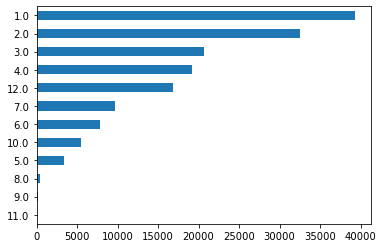

In [18]:
df['Gainesville Police Districts'].value_counts().iloc[:20].sort_values().plot(kind= 'barh')

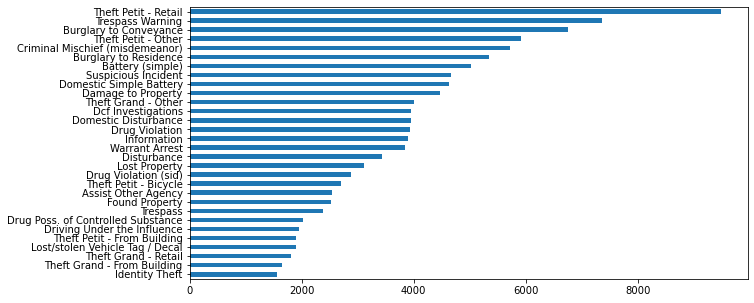

In [19]:
plt.figure(figsize=(10,5)) 
df['Incident Type'].value_counts().iloc[:30].sort_values().plot(kind= 'barh')

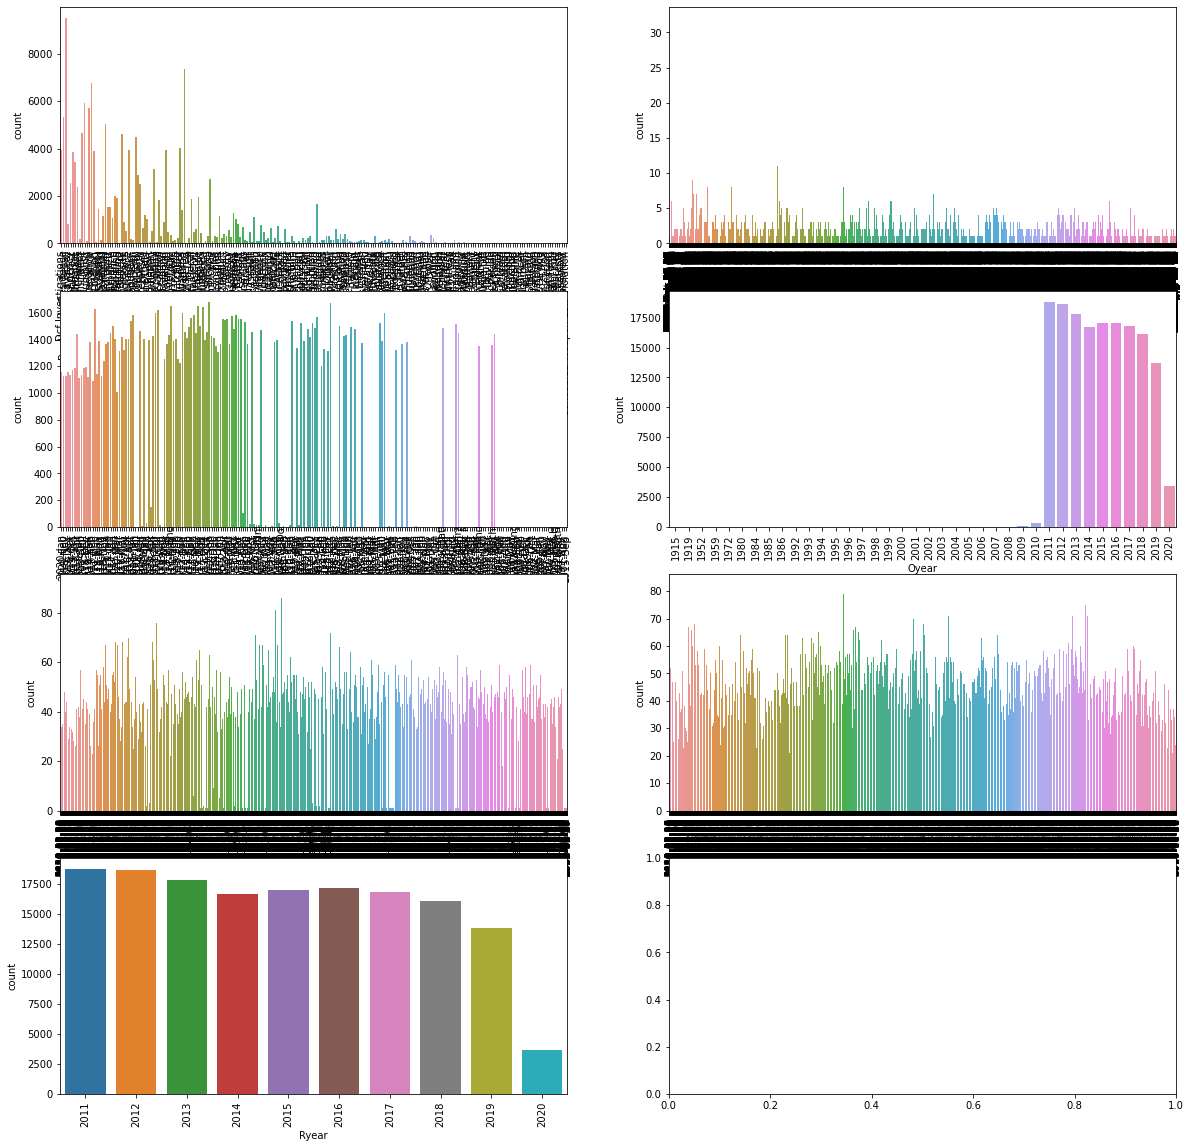

In [25]:
categorical = [ 'Incident Type', 'DOhour', 'DOmonth', 'Oyear','ODate','RDate','Ryear']

fig, ax = plt.subplots(4, 2, figsize=(20, 20))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [21]:
df=df.replace({'Monday':1, 'Saturday':6, 'Sunday':7, 'Thursday':4, 'Tuesday':2, 'Wednesday':3,'Friday':5})

df['Report Day of Week'] = df['Report Day of Week'].astype('category').cat.as_ordered()
df['Offense Day of Week'] = df['Offense Day of Week'].astype('category').cat.as_ordered()



In [22]:
#df.to_csv(r'C:\Users\chunx\crime\totaltimeserismonth0414.csv', index = None, header=True)

categorical=['Offense Day of Week', 'Report Day of Week']
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    #for label in subplot.get_xticklabels():
        #label.set_rotation(90)

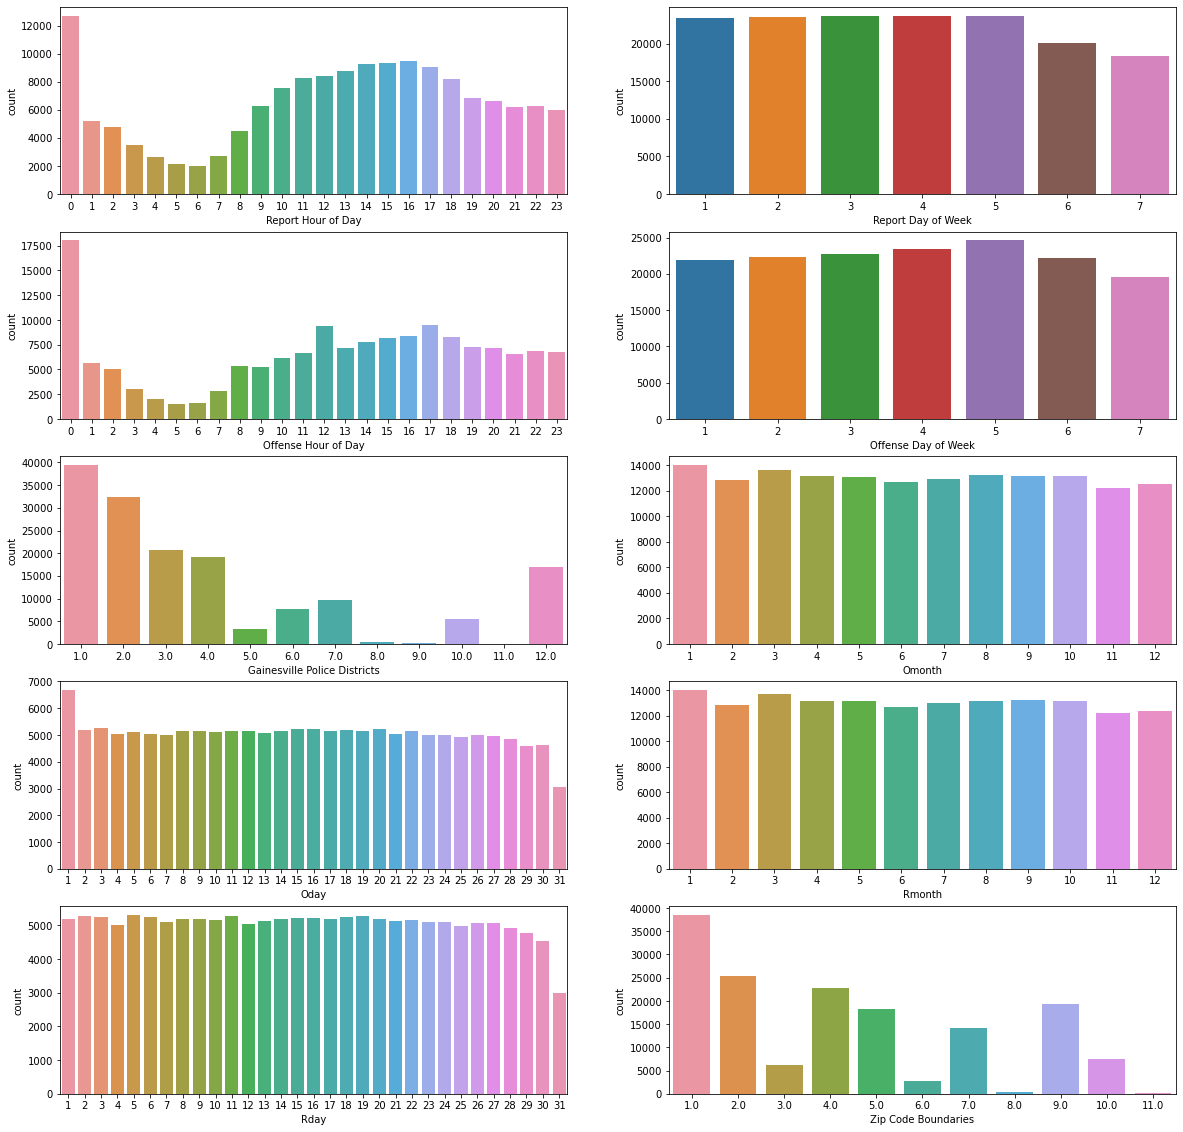

In [23]:
variableset2 = [ 'Report Hour of Day', 'Report Day of Week','Offense Hour of Day', 
'Offense Day of Week','Gainesville Police Districts','Omonth', 'Oday','Rmonth', 'Rday','Zip Code Boundaries']

fig, ax = plt.subplots(5, 2, figsize=(20, 20))
for variable, subplot in zip(variableset2, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)


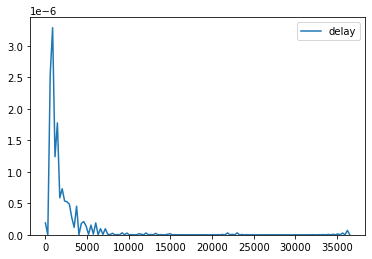

In [24]:
df['delay'].describe()

sns.kdeplot(df['delay'])

In [33]:
df['ID'] = df['ID'].astype('category').cat.as_ordered()


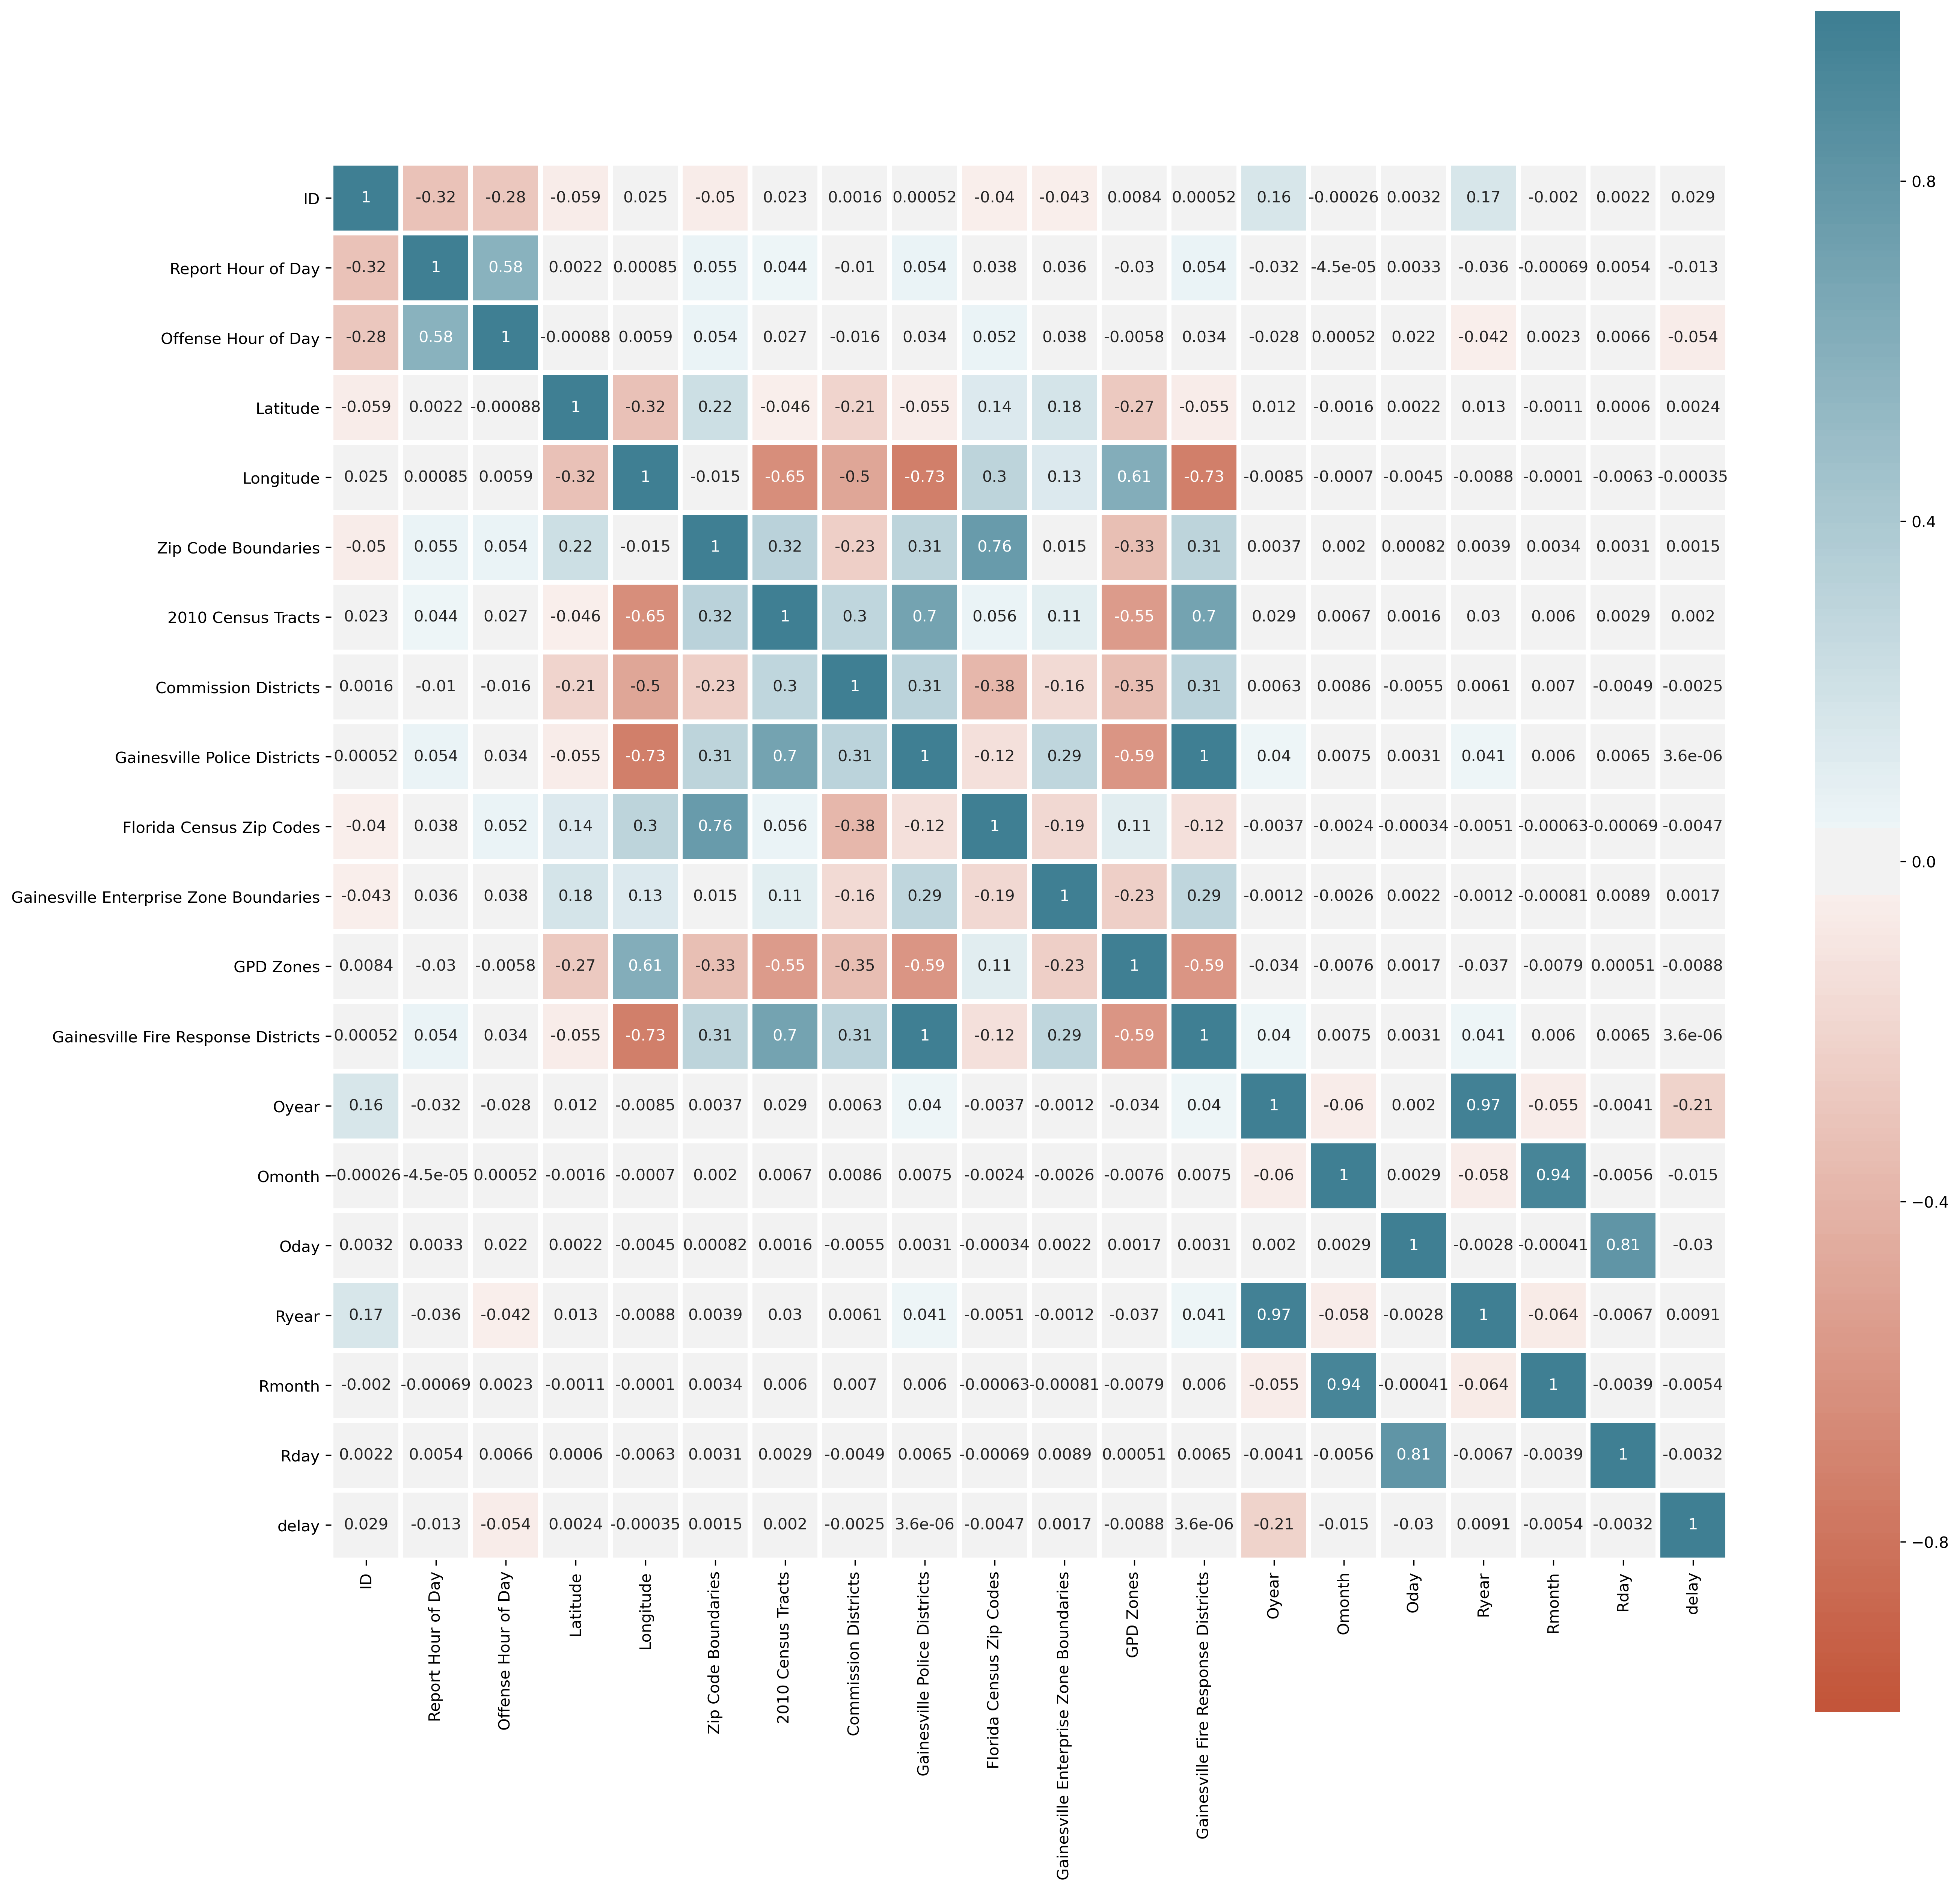

In [29]:
plt.figure(figsize = (20,20),dpi=300)
sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), annot = True, fmt='.2g',
            linewidths=3, linecolor='white',square=True, #cbar_kws= {'orientation': 'horizontal'}, 
            #mask=np.triu(df.corr())
           )
#plt.savefig("seaborn_heatmap_single_allvarables.png")

In [31]:
numerical=['Report Hour of Day', 'Offense Hour of Day', 'Latitude', 'Longitude','Gainesville Police Districts', 'Oyear', 'Omonth', 'Oday', 'Ryear', 'Rmonth', 'Rday', 'delay']
categorical=[ele for ele in df.columns if ele not in numerical]


00:02:29.95


<Figure size 3600x3600 with 0 Axes>

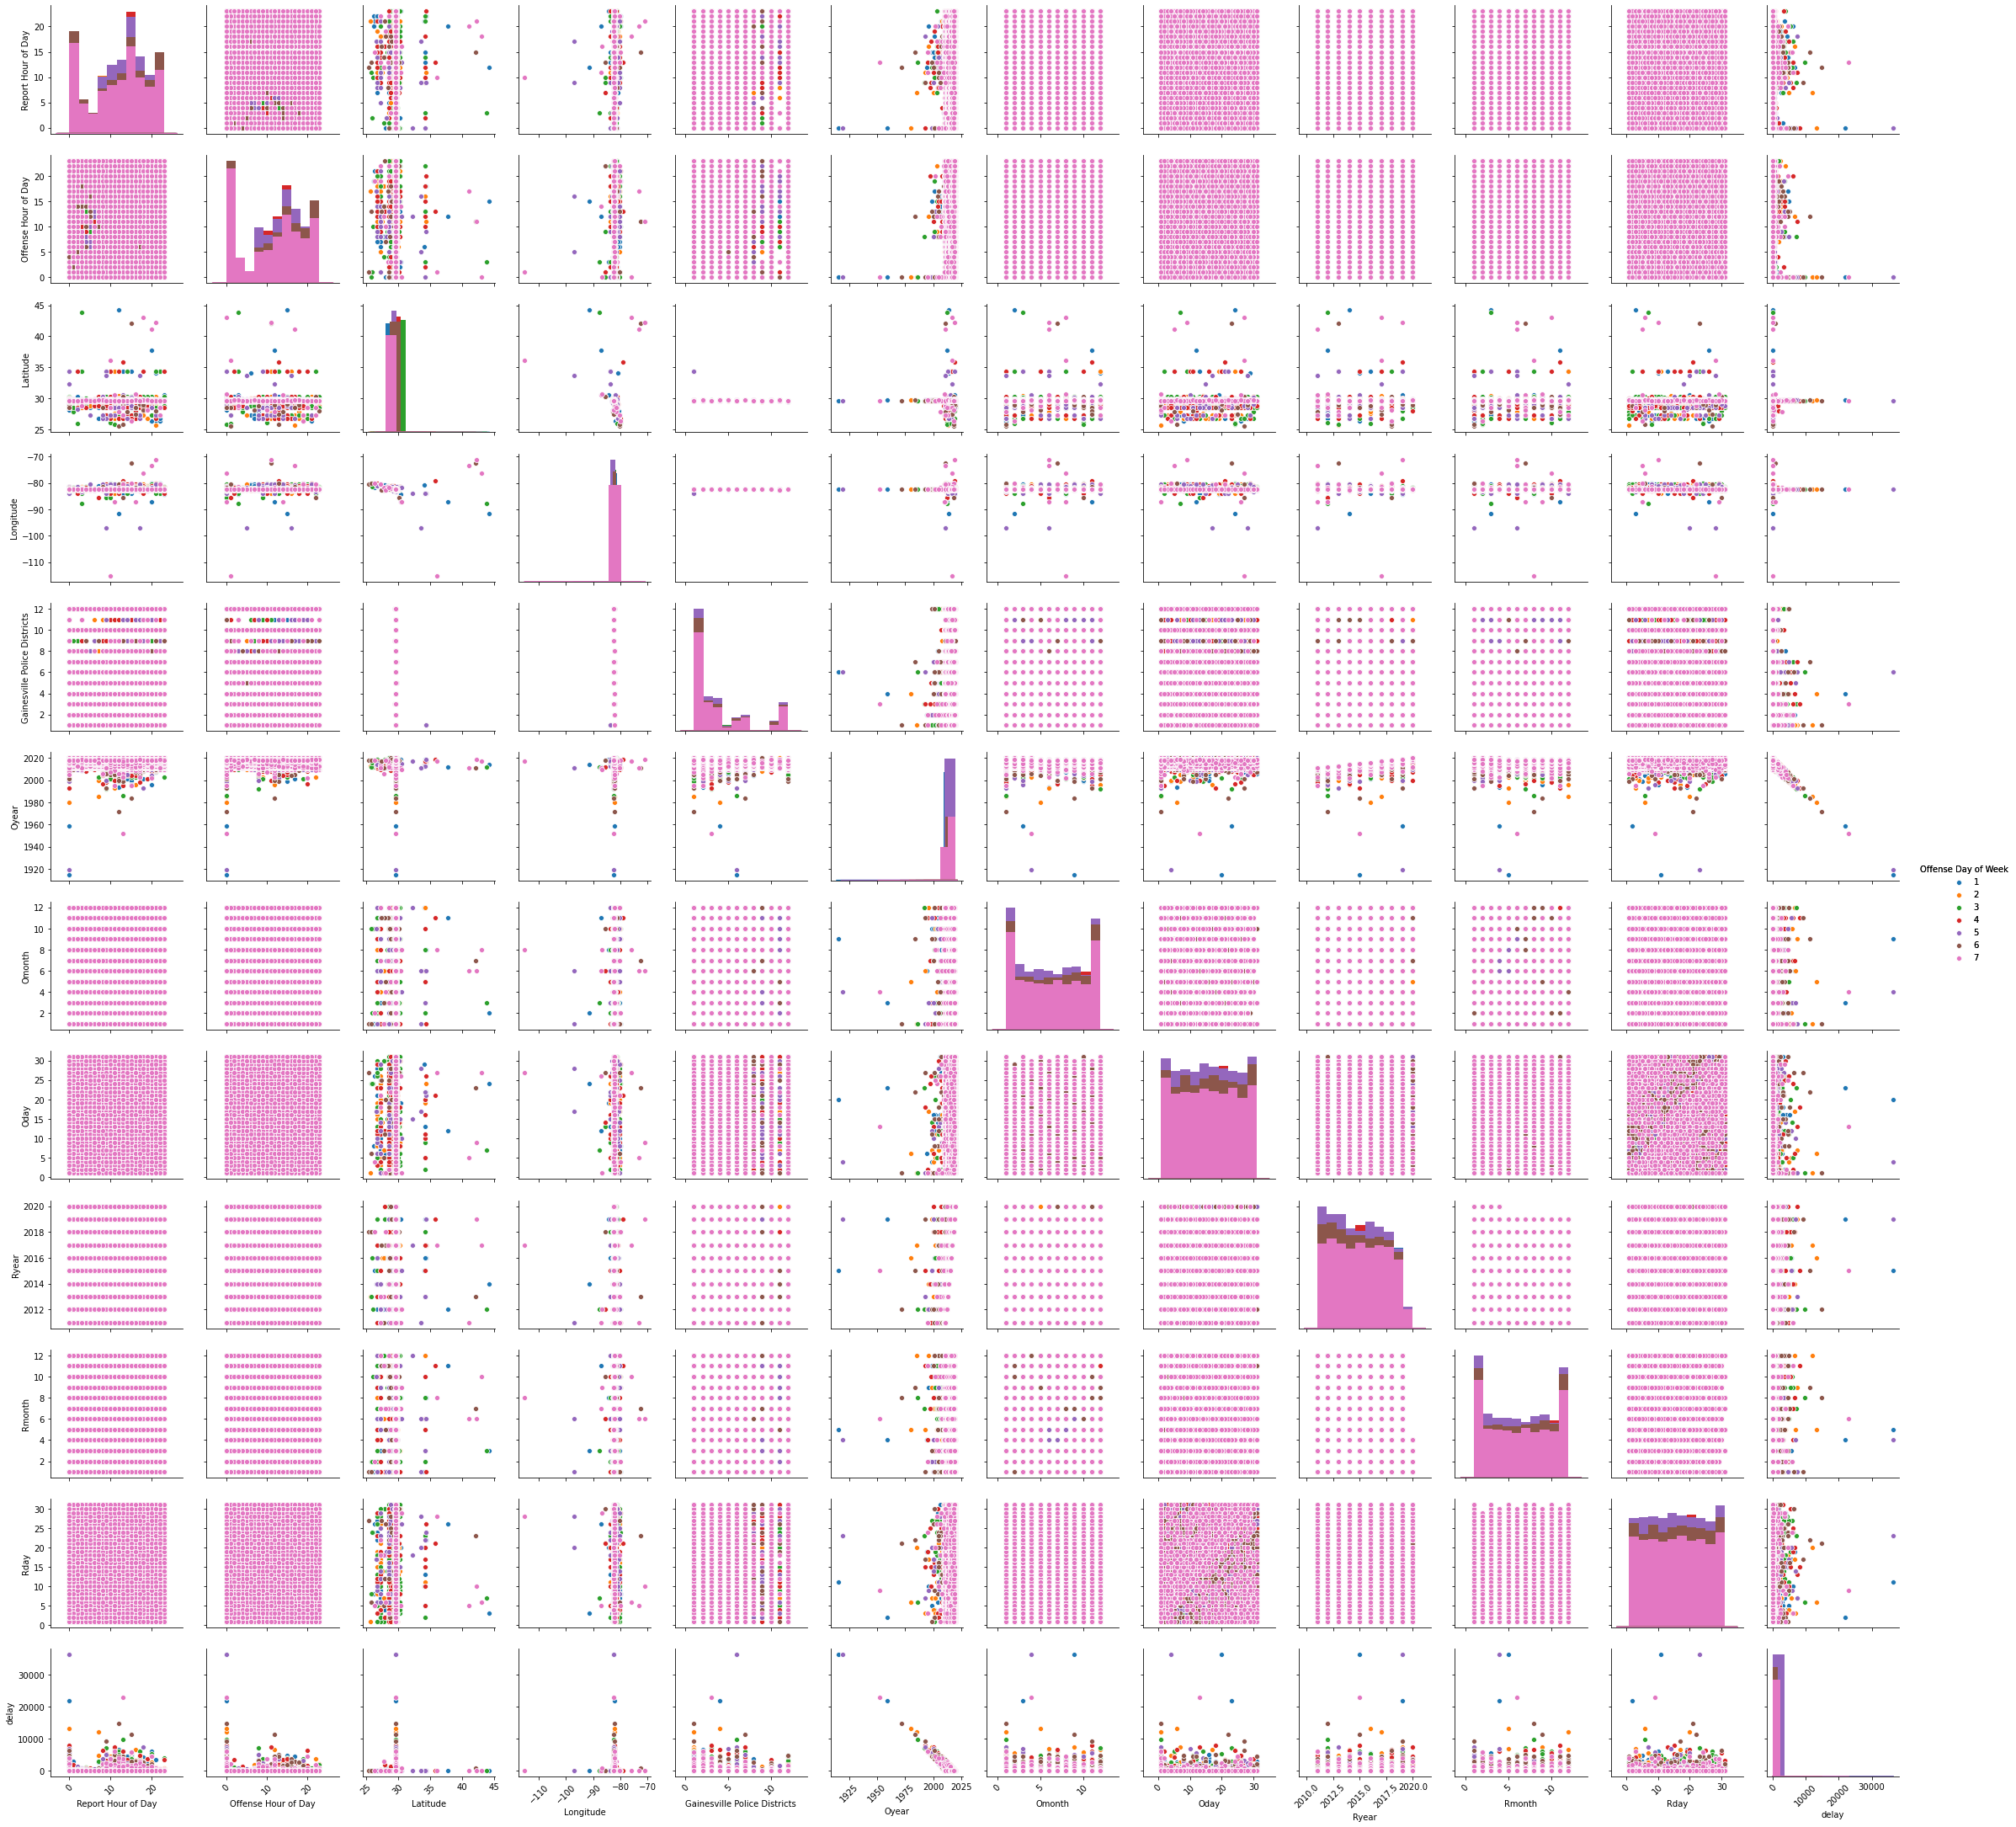

In [35]:
import warnings
warnings.filterwarnings('ignore')
start = time.time()
plt.figure(figsize = (50,50))
g = sns.pairplot(df, vars=df[numerical], hue="Offense Day of Week") 
g.map_diag(plt.hist) 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45) 
g.add_legend() 
g.set(alpha=0.5)
#plt.savefig("seaborn_pair_plot_single_alldata.png")
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

In [ ]:
# file for top5 model
sum(df['Incident Type'].value_counts().iloc[:5])/len(df)

list = df['Incident Type'].value_counts().iloc[:5].index

list

In [ ]:
df['Incident Type'].value_counts().iloc[:5]

df2=df[df['Incident Type'].isin(list)]

df2.duplicated().sum()

df2.drop_duplicates(keep=False,inplace=True)
df2=df2.drop(columns=['Commission Districts'])

df2=df2.dropna(how='any')

set(df2['Incident Type'])

In [ ]:
df2.shape

In [ ]:
df2.to_csv (r'C:\Users\chunx\crime\cityforML5top', index = None, header=True)